<a href="https://colab.research.google.com/github/hsnam95/class2022Spring/blob/main/sound_librosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Processing
---

### Fourier
* signal (inner product) a series of complex phasors with different frequencies
* inner product는 일종의 correlation (즉, 해당 frequency가 얼마나 있는지 probing)
* 왜? sine phasor 안 쓰나? phase sensitivity 때문

### filter
* A --> function -->  B
* signal A --> filter --> signal B
* 신호 (time function)를 입력으로 하는 함수를 filter라고 함
* 왜? filter 라고 부름? 이 함수의 목적이 특정 주파수에 대한 manipulation이므로.
(예: 어떤 주파수대를 작게, 크게, 통과, 제거 등)
* 신호를 filter하는 방법: weighted sum of shifts 
* Y(k) = b1X(k) + b2X(k-1) + ...
* Y = H * X
* a1Y(k) + a2Y(k-1) + ... = X(k)
* Y = (1/H) * X



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

### load / plot / play sound file

In [2]:
# from google.colab import files
# fn = files.upload()

import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")

s, sr = librosa.load('aeiou.wav')

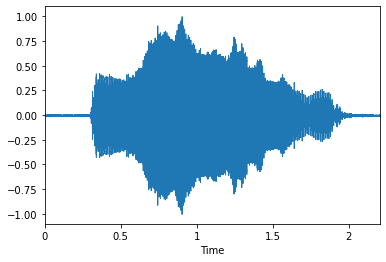

In [5]:
s = librosa.util.normalize(s)
librosa.display.waveplot(s, sr)

In [6]:
ipd.Audio(s[7000:12000], rate=sr)

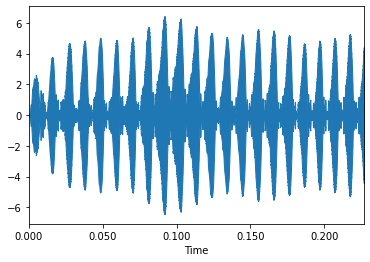

In [36]:
from scipy.signal import lfilter
sig = s[7000:12000]
sig = lfilter(np.array([-1/2]), np.array([1/2, -1/2, 1/2, -1/2]), sig, axis=0)
librosa.display.waveplot(sig, sr)
ipd.Audio(sig, rate=sr)

### Spectrogram

In [ ]:
s_preemp = librosa.effects.preemphasis(s)

n_fft=512
hop_length=int(0.001*sr)
win_length=int(sr*0.008)

plt.figure(figsize=(15, 5))

spec = librosa.stft(s_preemp, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window = 'hann')

magspec = np.abs(spec)

dBspec = librosa.amplitude_to_db(magspec, ref=np.max)

librosa.display.specshow(dBspec, sr=sr, x_coords = np.linspace(1, len(s), dBspec.shape[1])/sr , x_axis='time', y_axis='linear', cmap='Greys')

plt.ylim((0,5000))

### RMS(Root Mean Square) for intensity

In [ ]:
rms = librosa.feature.rms(s)
plt.plot(rms[0])

### F0 measure for Pitch

In [ ]:
F0, voiced_flag, voiced_prob = librosa.pyin(s, 60, 200)
plt.plot(F0, '.')

In [ ]:
plt.plot(voiced_flag, '.')